In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
sns.set()
%matplotlib inline

In [164]:
import warnings
warnings.filterwarnings('ignore')

In [165]:
df = pd.read_csv('diamonds.csv')
df

Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
0               0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95   
1               1   0.21  Premium     E     SI1   59.8   61.0    326  3.89   
2               2   0.23     Good     E     VS1   56.9   65.0    327  4.05   
3               3   0.29  Premium     I     VS2   62.4   58.0    334  4.20   
4               4   0.31     Good     J     SI2   63.3   58.0    335  4.34   
...           ...    ...      ...   ...     ...    ...    ...    ...   ...   
53942       53942   0.80    Ideal     E     SI2   60.8   56.0   2939  6.02   
53943       53943   0.73    Ideal     F     VS2   62.7   58.0   2939  5.72   
53944       53944   0.72    Ideal     E     SI2   62.4   57.0   2939  5.71   
53945       53945   0.75    Ideal     G     VS2   60.6   55.0   2939  5.93   
53946       53946   0.80  Premium     E     SI2   59.9   58.0   2939  6.03   

          y     z  
0      3.98  2.43  
1      3.84  2.31  
2      4.07  2.31  
3      4.23  2.63  
4      4.35  2.75  
...     ...   ...  
53942  6.01  3.66  
53943  5.77   3.6  
53944  5.74  3.57  
53945  5.91  3.59  
53946  5.96  3.59  

[53947 rows x 11 columns]

In [166]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [167]:
df.tail()

Unnamed: 0  carat      cut color clarity  depth  table  price     x  \
53942       53942   0.80    Ideal     E     SI2   60.8   56.0   2939  6.02   
53943       53943   0.73    Ideal     F     VS2   62.7   58.0   2939  5.72   
53944       53944   0.72    Ideal     E     SI2   62.4   57.0   2939  5.71   
53945       53945   0.75    Ideal     G     VS2   60.6   55.0   2939  5.93   
53946       53946   0.80  Premium     E     SI2   59.9   58.0   2939  6.03   

          y     z  
53942  6.01  3.66  
53943  5.77   3.6  
53944  5.74  3.57  
53945  5.91  3.59  
53946  5.96  3.59

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53947 entries, 0 to 53946
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53947 non-null  int64  
 1   carat       53947 non-null  float64
 2   cut         53944 non-null  object 
 3   color       53946 non-null  object 
 4   clarity     53947 non-null  object 
 5   depth       53946 non-null  float64
 6   table       53947 non-null  float64
 7   price       53947 non-null  int64  
 8   x           53947 non-null  float64
 9   y           53947 non-null  float64
 10  z           53947 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 4.5+ MB


# EDA

since 'Unnamed: 0' column doesn’t represent any information so i’ll drop it

In [169]:
df.drop(columns='Unnamed: 0' , inplace = True)
df

carat      cut color clarity  depth  table  price     x     y     z
0       0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...      ...   ...     ...    ...    ...    ...   ...   ...   ...
53942   0.80    Ideal     E     SI2   60.8   56.0   2939  6.02  6.01  3.66
53943   0.73    Ideal     F     VS2   62.7   58.0   2939  5.72  5.77   3.6
53944   0.72    Ideal     E     SI2   62.4   57.0   2939  5.71  5.74  3.57
53945   0.75    Ideal     G     VS2   60.6   55.0   2939  5.93  5.91  3.59
53946   0.80  Premium     E     SI2   59.9   58.0   2939  6.03  5.96  3.59

[53947 rows x 10 columns]

dealing with duplicates

In [170]:
df.duplicated().sum()

153

In [171]:
df.drop_duplicates(inplace=True)

In [172]:
df.duplicated().sum()

0

changing the datatype for 'z' column

In [173]:
df['z'] = pd.to_numeric(df['z'], errors='coerce')

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53791 non-null  object 
 2   color    53793 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53793 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53793 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


checking numerical data ranges

In [175]:
for col in df.select_dtypes(include=['float64' , 'int64']):
    print(f'the minimum value for {col} column is : {min(df[col])}')
    print(f'the maximum value for {col} column is : {max(df[col])}')
    print('------------------------------------------------------------')

the minimum value for carat column is : 0.2
the maximum value for carat column is : 5.01
------------------------------------------------------------
the minimum value for depth column is : 43.0
the maximum value for depth column is : 79.0
------------------------------------------------------------
the minimum value for table column is : 43.0
the maximum value for table column is : 95.0
------------------------------------------------------------
the minimum value for price column is : -200
the maximum value for price column is : 18823
------------------------------------------------------------
the minimum value for x column is : 0.0
the maximum value for x column is : 10.74
------------------------------------------------------------
the minimum value for y column is : 0.0
the maximum value for y column is : 58.9
------------------------------------------------------------
the minimum value for z column is : 0.0
the maximum value for z column is : 31.8
------------------------------

fixing price range

In [176]:
df['price'] = abs(df['price'])

In [177]:
print(f"the minimum value for price column is : {min(df['price'])}")
print(f"the maximum value for price column is : {max(df['price'])}")

the minimum value for price column is : 200
the maximum value for price column is : 18823


checking for inconsistancy in string columns

In [178]:
for col in df.select_dtypes(include='object'):
    print(f'the unique values for {col} column is : {df[col].unique()}')
    print('-----------------------------------------------------------')

the unique values for cut column is : ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair' 'very good' 'ideal' 'premium'
 nan]
-----------------------------------------------------------
the unique values for color column is : ['E' 'I' 'J' 'H' 'F' 'G' 'D' '87' nan]
-----------------------------------------------------------
the unique values for clarity column is : ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' '8' '7y' 'IF' 'vs2']
-----------------------------------------------------------


solving inconsistancy

In [179]:
# solving problems with cut column 
df.cut = df.cut.str.lower()
df.cut.unique()

array(['ideal', 'premium', 'good', 'very good', 'fair', nan], dtype=object)

In [180]:
df.color = df.color.replace({'87':None})
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D', None, nan], dtype=object)

In [181]:
df.clarity = df.clarity.str.upper()
print(df.clarity.unique())
df.clarity.replace({'8' : None , '7Y': None } , inplace=True)
df.clarity.unique()

['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' '8' '7Y' 'IF']


array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', None, 'IF'],
      dtype=object)

dealing with missing values

In [182]:
df.isna().sum()

carat      0
cut        3
color      2
clarity    2
depth      1
table      0
price      0
x          0
y          0
z          1
dtype: int64

In [183]:
df.dropna(inplace=True)

In [184]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

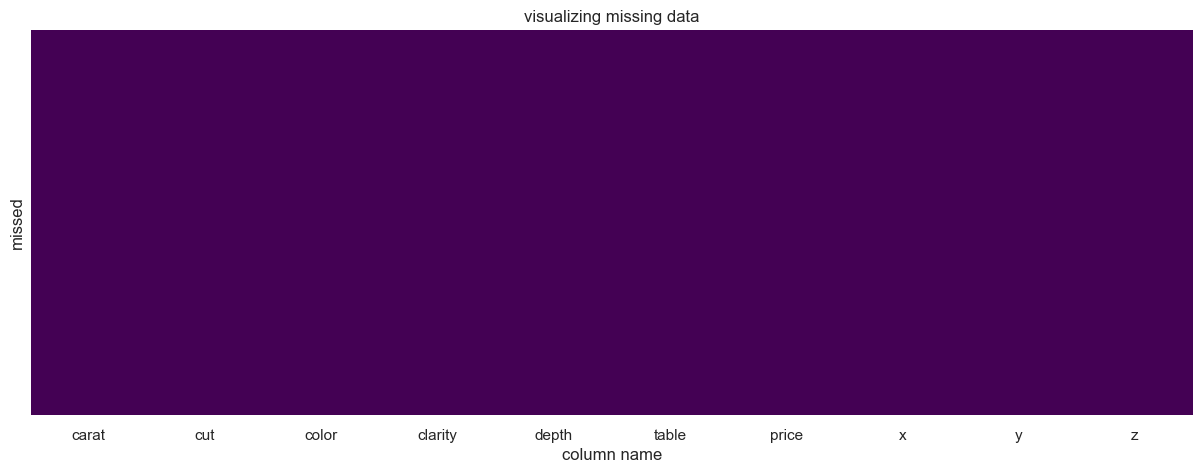

In [185]:
plt.figure(figsize = (15,5))
sns.heatmap(df.isna() , yticklabels=False , cmap='viridis'  , cbar=False)
plt.title('visualizing missing data')
plt.xlabel('column name')
plt.ylabel('missed')
plt.show()

# dealing with outliers

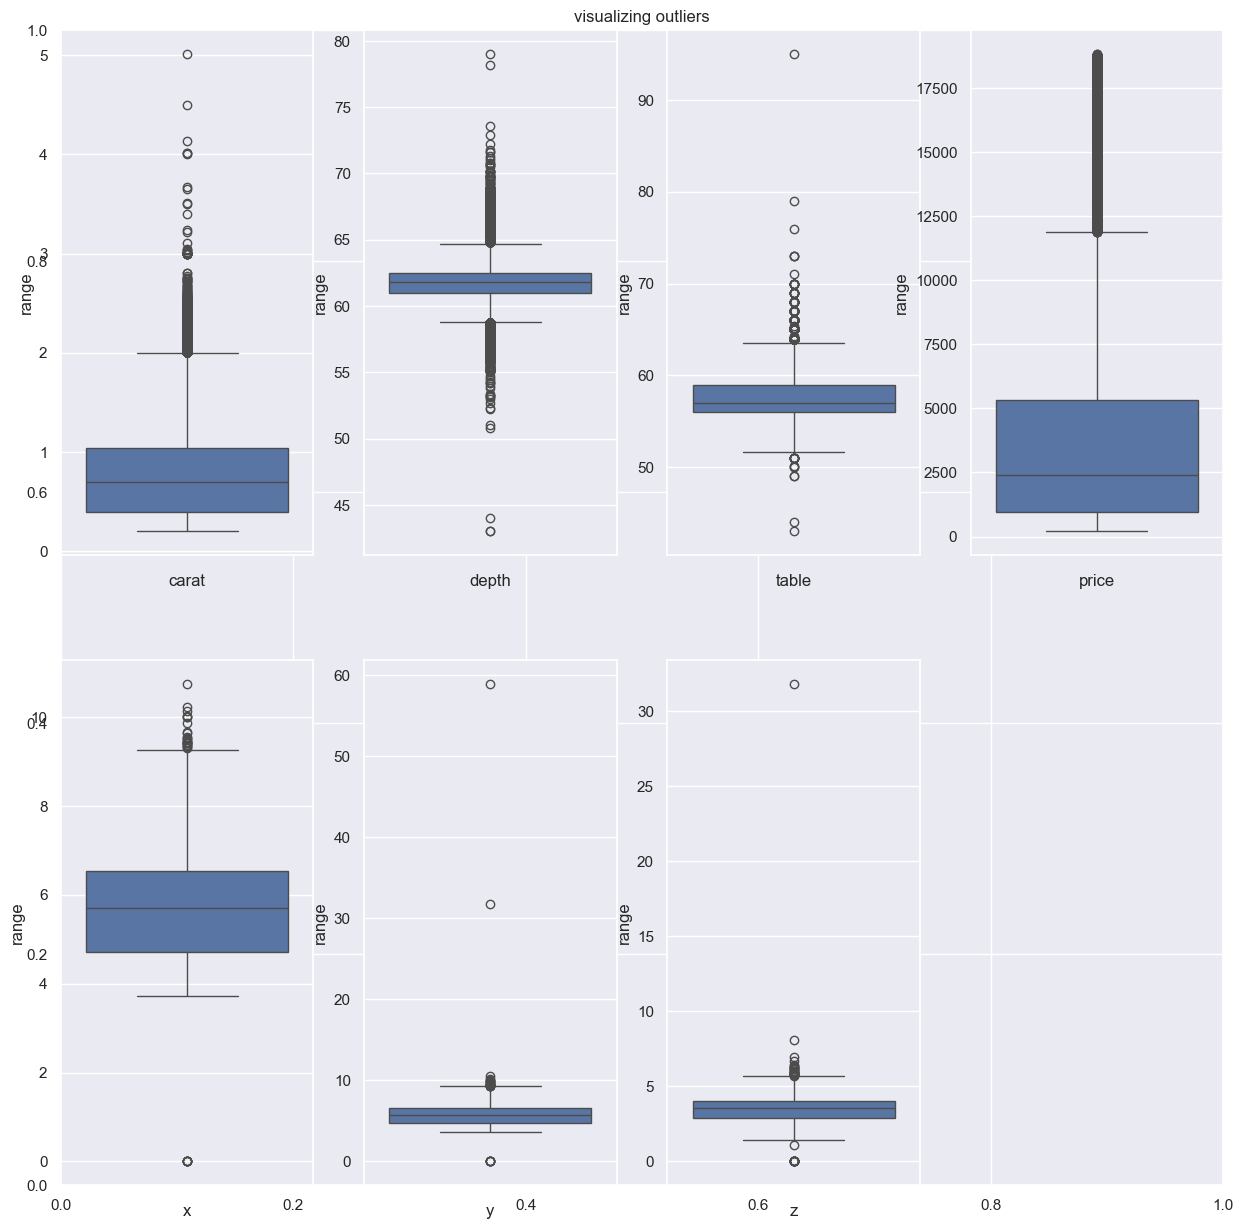

In [186]:
fig = 1 
plt.figure(figsize=(15,15))
plt.title('visualizing outliers')
for col in df.select_dtypes(include=['float64' , 'int64']) :
    plt.subplot(2,4,fig)
    sns.boxplot(df[col] )
    plt.xlabel(col)
    plt.ylabel('range')
    fig +=1

plt.show()

# visualization

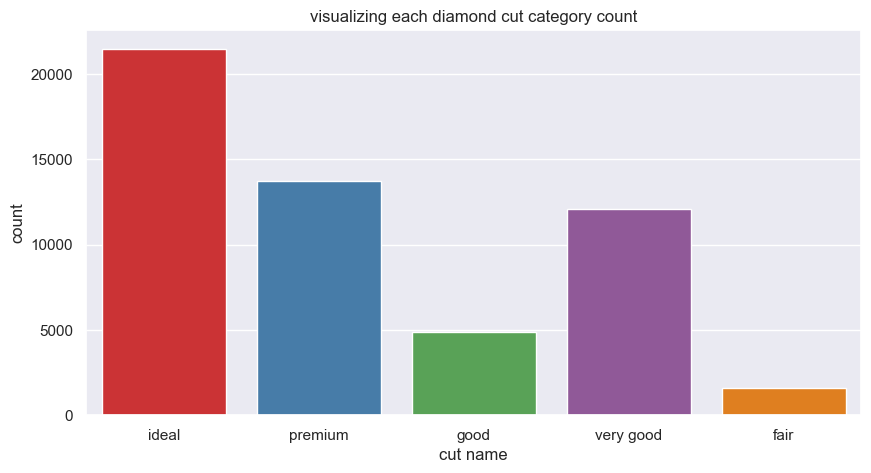

In [187]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = 'cut' , palette='Set1')
plt.title('visualizing each diamond cut category count')
plt.xlabel('cut name')
plt.ylabel('count')
plt.show()

the most used cut is 'ideal' and the lowest one in 'fair'

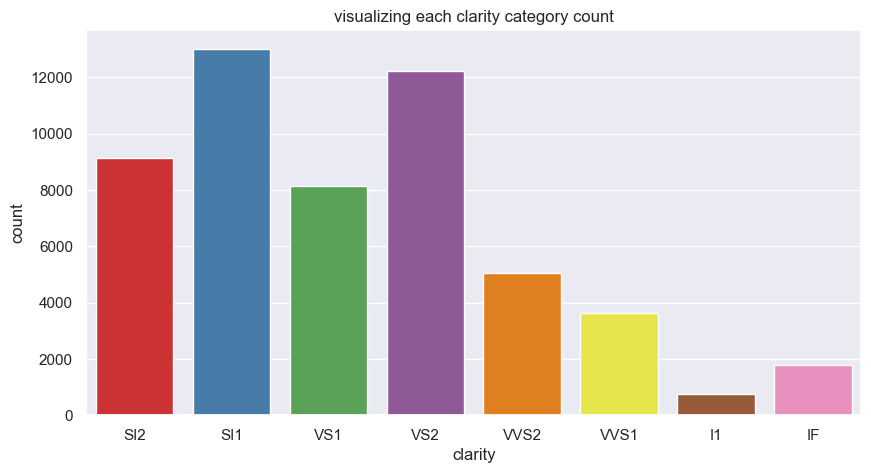

In [188]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = 'clarity' , palette='Set1')
plt.title('visualizing each clarity category count')
plt.xlabel('clarity')
plt.ylabel('count')
plt.show()

the heighest clarity is 'si1'

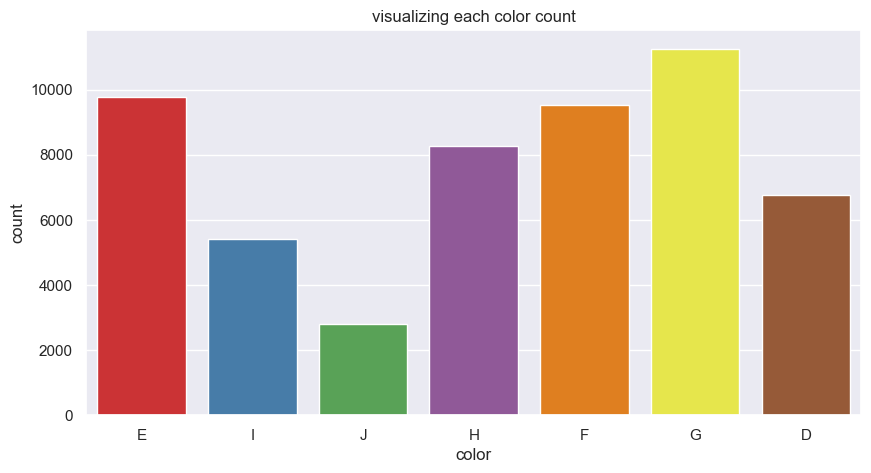

In [189]:
plt.figure(figsize = (10,5))
sns.countplot(data = df , x = 'color' , palette='Set1')
plt.title('visualizing each color count')
plt.xlabel('color')
plt.ylabel('count')
plt.show()

most used color is 'G'

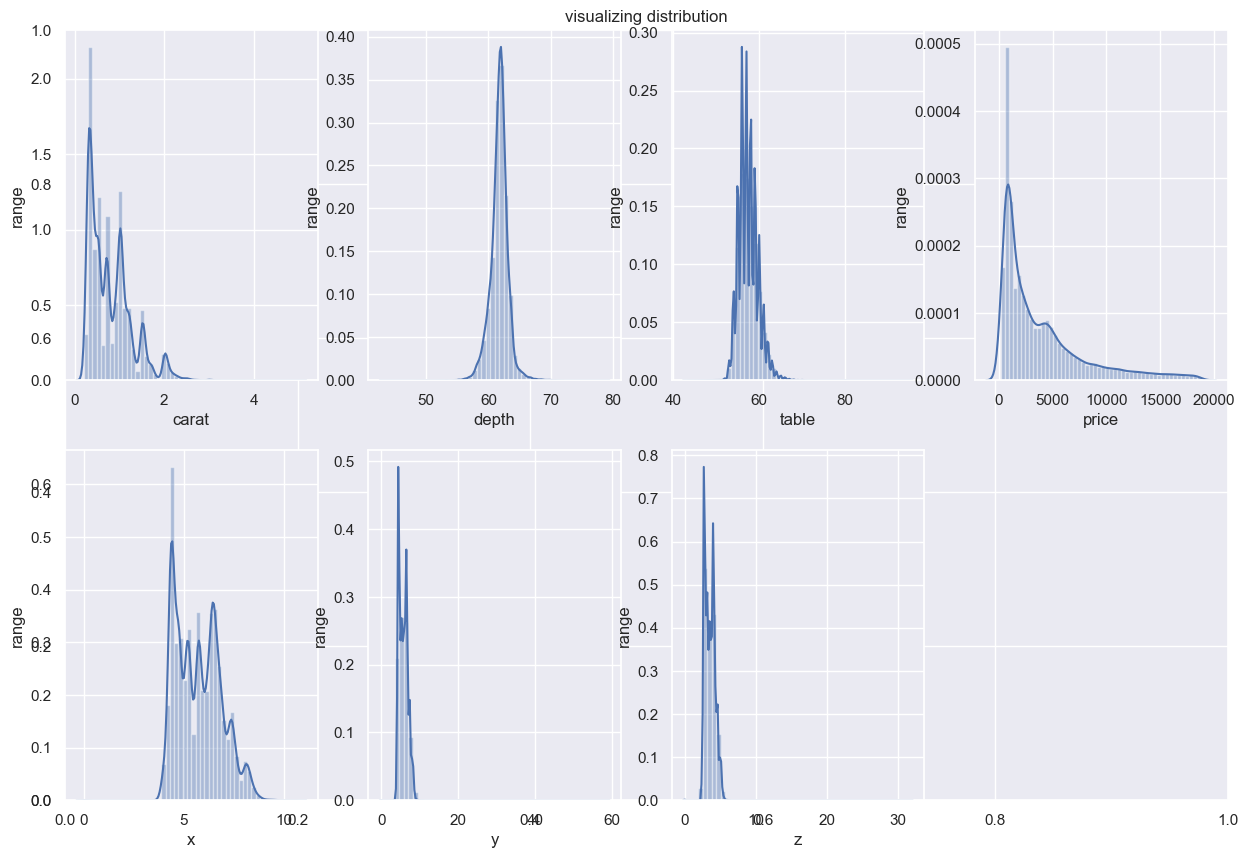

In [190]:
fig = 1 
plt.figure(figsize=(15,10))
plt.title('visualizing distribution')
for col in df.select_dtypes(include=['float64' , 'int64']) :
    plt.subplot(2,4,fig)
    sns.distplot(df[col] )
    plt.xlabel(col)
    plt.ylabel('range')
    fig +=1

plt.show()

some of the data has right skew distrbution and almost normal distribution

In [211]:
df.select_dtypes(include=['float64' , 'int64']).corr()

carat     depth     table     price         x         y         z
carat  1.000000  0.027864  0.181098  0.921539  0.975382  0.951909  0.953540
depth  0.027864  1.000000 -0.297698 -0.011073 -0.025345 -0.029385  0.094749
table  0.181098 -0.297698  1.000000  0.126558  0.194866  0.183242  0.150298
price  0.921539 -0.011073  0.126558  1.000000  0.884498  0.865389  0.861199
x      0.975382 -0.025345  0.194866  0.884498  1.000000  0.974592  0.970680
y      0.951909 -0.029385  0.183242  0.865389  0.974592  1.000000  0.951837
z      0.953540  0.094749  0.150298  0.861199  0.970680  0.951837  1.000000

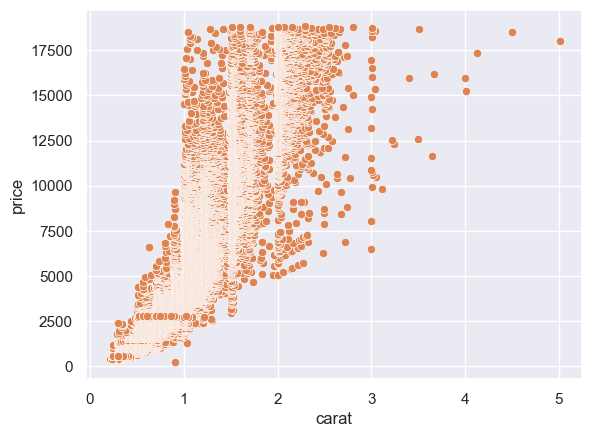

In [214]:
sns.scatterplot(data = df , x ='carat' , y='price' )
plt.title('relationship between carat and price of the diamond')

plt.show()

most bought diamonds weights fall between 0.5 to 2.5

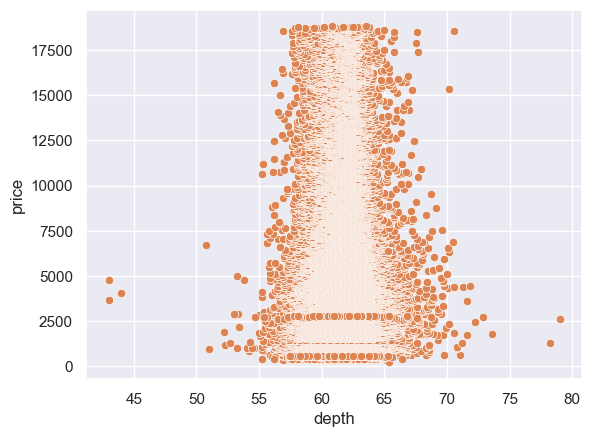

In [220]:
sns.scatterplot(data = df , x ='depth' , y="price")
plt.show()

depth of the diamond doesn’t affect the price 

In [217]:
px.scatter_3d(data_frame=df , x='x' , y = 'y' , z ='z' , color='price')

the price of the diamond is most effected by the length (x) 

# scaling and encoding data

In [209]:
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  very good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.00

[53785 rows x 10 columns]

In [240]:
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']
clarity_mapping = {k: v for v, k in enumerate(clarity_order)}
df['clarity_encoded'] = df['clarity'].map(clarity_mapping)

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  very good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.00   

       clarity_encoded  
0                    6  
1                    5  
2                    3  
3                    4  
4                    6  
...                ...  
53935                5  
53936                5  
53937                5  
53938                6  
53939                6  

[53785 rows x 11 columns]

In [241]:
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
color_mapping = {k: v for v, k in enumerate(color_order)}
df['color_encoded'] = df['color'].map(color_mapping)

In [248]:
cut_order = ['ideal', 'premium', 'very good', 'good', 'fair']
print(cut_order)
cut_mapping = {k: v for v, k in enumerate(cut_order)}
df['cut_encoded'] = df['cut'].map(cut_mapping)


['ideal', 'premium', 'very good', 'good', 'fair']


In [249]:
df

carat        cut color clarity  depth  table  price     x     y     z  \
0       0.23      ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1       0.21    premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2       0.23       good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3       0.29    premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4       0.31       good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...   
53935   0.72      ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50   
53936   0.72       good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61   
53937   0.70  very good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56   
53938   0.86    premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74   
53939   0.75      ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.00   

       clarity_encoded  color_encoded  cut_encoded  
0                    6              1            0  
1                    5              1            1  
2                    3              1            3  
3                    4              5            1  
4                    6              6            3  
...                ...            ...          ...  
53935                5              0            0  
53936                5              0            3  
53937                5              0            2  
53938                6              4            1  
53939                6              0            0  

[53785 rows x 13 columns]

In [251]:
# since depth and table has almost normal distribution then i’ll use z-score scaling
from sklearn.preprocessing import StandardScaler
sta_sca = StandardScaler() 

In [253]:
df['depth'] = sta_sca.fit_transform(df[['depth']])  
df['table'] = sta_sca.fit_transform(df[['table']])

In [254]:
df

carat        cut color clarity     depth     table  price     x     y  \
0       0.23      ideal     E     SI2 -0.173470 -1.100444    326  3.95  3.98   
1       0.21    premium     E     SI1 -1.362364  1.585608    326  3.89  3.84   
2       0.23       good     E     VS1 -3.390477  3.376310    327  4.05  4.07   
3       0.29    premium     I     VS2  0.455944  0.242582    334  4.20  4.23   
4       0.31       good     J     SI2  1.085359  0.242582    335  4.34  4.35   
...      ...        ...   ...     ...       ...       ...    ...   ...   ...   
53935   0.72      ideal     D     SI1 -0.663015 -0.205093   2757  5.75  5.76   
53936   0.72       good     D     SI1  0.945489 -1.100444   2757  5.69  5.75   
53937   0.70  very good     D     SI1  0.735684  1.137933   2757  5.66  5.68   
53938   0.86    premium     H     SI2 -0.523145  0.242582   2757  6.15  6.12   
53939   0.75      ideal     D     SI2  0.316074 -1.100444   2757  5.83  5.87   

          z  clarity_encoded  color_encoded  cut_encoded  
0      2.43                6              1            0  
1      2.31                5              1            1  
2      2.31                3              1            3  
3      2.63                4              5            1  
4      2.75                6              6            3  
...     ...              ...            ...          ...  
53935  3.50                5              0            0  
53936  3.61                5              0            3  
53937  3.56                5              0            2  
53938  3.74                6              4            1  
53939  3.00                6              0            0  

[53785 rows x 13 columns]

In [255]:
# for price column i’ll use log transform since it has right skew dist and no values near to zero
df['price'] = np.log(df['price'])

In [256]:
# for carat column i’ll use log1p since it has right skew dist and there are values near to zero
df['carat'] = np.log1p(df['carat'])

In [257]:
# finally for x , y , z i’ll use Yeo-Johnson transform since it has zero values
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')
df[['x', 'y', 'z']] = pt.fit_transform(df[['x', 'y', 'z']])

In [260]:
# final df
df.drop(columns=['cut','color','clarity'])

carat     depth     table     price         x         y         z  \
0      0.207014 -0.173470 -1.100444  5.786897 -1.758190 -1.754571 -1.726491   
1      0.190620 -1.362364  1.585608  5.786897 -1.830174 -1.929603 -1.948952   
2      0.207014 -3.390477  3.376310  5.789960 -1.639998 -1.644731 -1.948952   
3      0.254642  0.455944  0.242582  5.811141 -1.466723 -1.454373 -1.370013   
4      0.270027  1.085359  0.242582  5.814131 -1.309138 -1.315537 -1.164065   
...         ...       ...       ...       ...       ...       ...       ...   
53935  0.542324 -0.663015 -0.205093  7.921898  0.093740  0.108857  0.009240   
53936  0.542324  0.945489 -1.100444  7.921898  0.039852  0.099884  0.167077   
53937  0.530628  0.735684  1.137933  7.921898  0.012740  0.036686  0.095734   
53938  0.620576 -0.523145  0.242582  7.921898  0.442018  0.423001  0.349535   
53939  0.559616  0.316074 -1.100444  7.921898  0.164902  0.206655 -0.752399   

       clarity_encoded  color_encoded  cut_encoded  
0                    6              1            0  
1                    5              1            1  
2                    3              1            3  
3                    4              5            1  
4                    6              6            3  
...                ...            ...          ...  
53935                5              0            0  
53936                5              0            3  
53937                5              0            2  
53938                6              4            1  
53939                6              0            0  

[53785 rows x 10 columns]

# *thanks*